## Full Notebook for Insurance Claims dataset EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Missing Values, outliers, inconsistencies

In [2]:
df_ins = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\insurance claims\insurance_claims.csv')
df_ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Grap the info and description of the dataframe
df_ins.info()
df_ins.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_number,1000.0,NaN,NaN,NaN,546238.648,257063.005276,100804.0,335980.25,533135.0,759099.75,999435.0
policy_bind_date,1000,951,1992-08-05,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0


### Data Cleaning, Preprocessing, Exploratory Data Analysis Section

In [ ]:
# Remove unnecessary coumns from the dataset
df_ins = df_ins.drop(columns=['policy_bind_date', 'policy_number', 'incident_location', '_c39'])

# Update the authorities contacted column with "not specified"
df_ins['authorities_contacted'] = df_ins['authorities_contacted'].fillna('not specified')

# Replace all "?" with NaN values
df_ins['property_damage'] = df_ins['property_damage'].replace('?', 'not_specified')
df_ins['police_report_available'] = df_ins['police_report_available'].replace('?', 'not_specified')
df_ins['collision_type'] = df_ins['collision_type'].replace('?', 'not_specified')

# Encode the target
df_ins['fraud_reported'] = df_ins['fraud_reported'].map({'Y': 1, 'N': 0})

In [23]:
df_ins.to_csv(r"C:\Users\JT von Seggern\DS Masters Repos\799S-Data-Science-Capstone\data\insurance_claims_cleaned.csv", sep=',')
print("New Insurance Claims file saved")

New Insurance Claims file saved


In [5]:
# Check for missing values
# df_ins[df_ins['authorities_contacted'].isnull()]

# # Filter for all rows equal to ?
# df_ins[df_ins['property_damage'] == '?']
# df_ins[df_ins['police_report_available'] == '?']
# df_ins[df_ins['collision_type'] == '?']

### Outlier Handling

Number of outliers for policy_annual_premium: 1
Number of outliers for total_claim_amount: 0
Number of outliers for injury_claim: 0
Number of outliers for property_claim: 1
Number of outliers for injury_claim: 0
Number of outliers for property_claim: 1
Number of outliers for vehicle_claim: 0
Number of outliers for age: 0
Number of outliers for vehicle_claim: 0
Number of outliers for age: 0
Number of outliers for capital-gains: 0
Number of outliers for capital-loss: 0
Number of outliers for capital-gains: 0
Number of outliers for capital-loss: 0


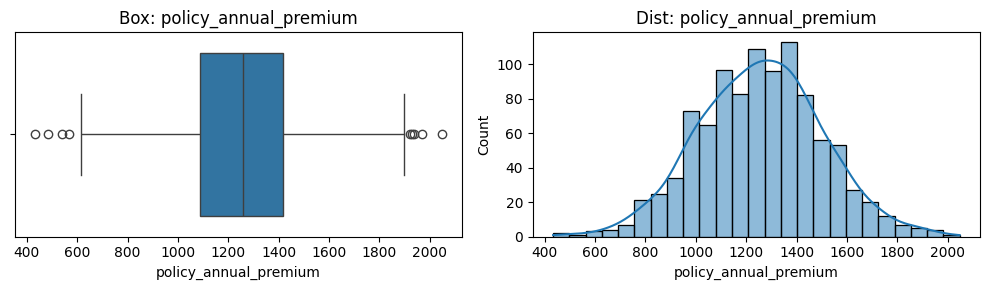

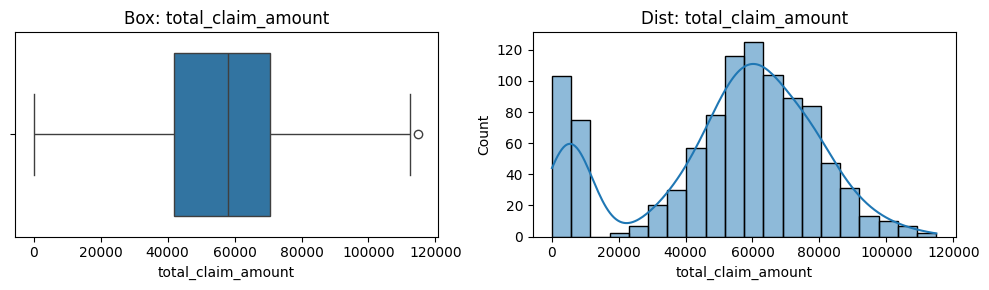

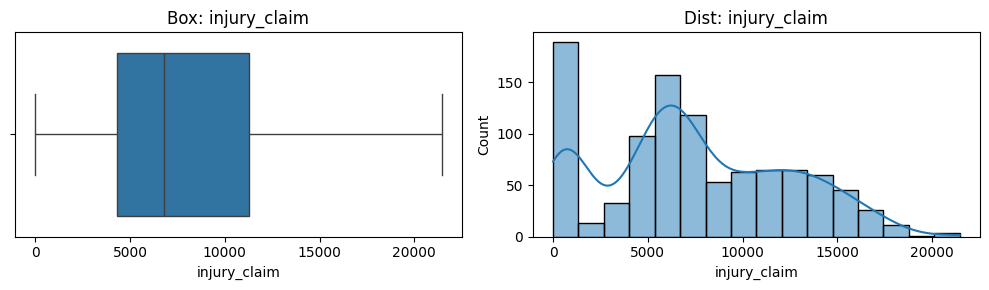

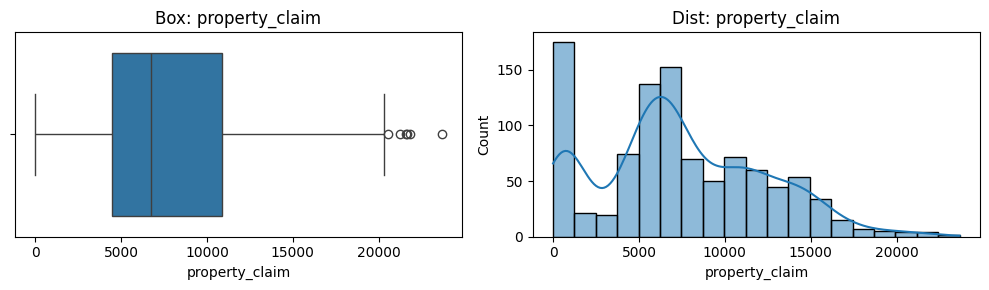

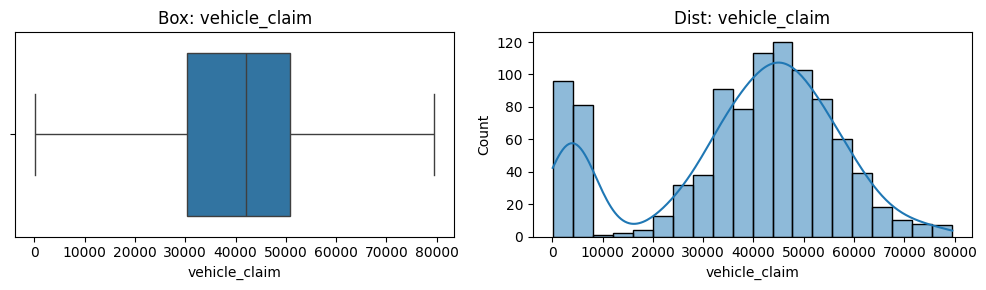

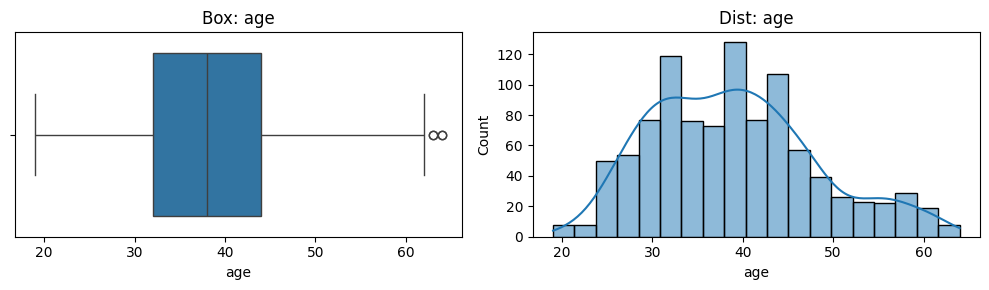

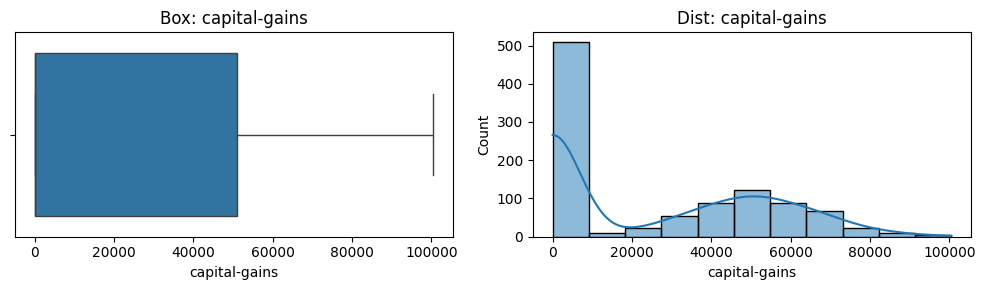

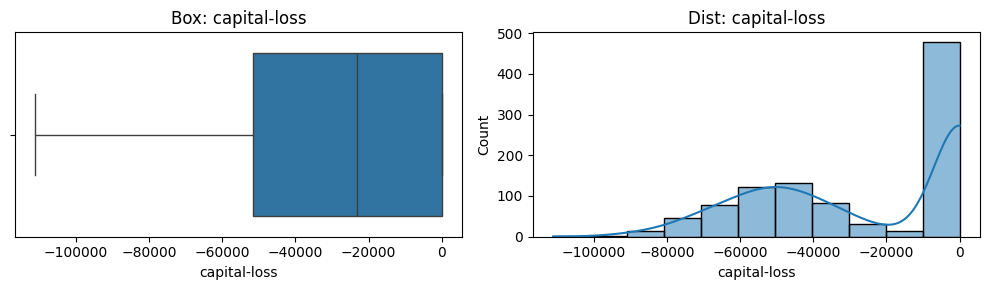

In [6]:
num_cols = ['policy_annual_premium','total_claim_amount','injury_claim','property_claim','vehicle_claim','age','capital-gains','capital-loss']

for c in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    sns.boxplot(x=df_ins[c], ax=ax[0])
    sns.histplot(df_ins[c], kde=True, ax=ax[1])
    ax[0].set_title(f'Box: {c}')
    ax[1].set_title(f'Dist: {c}')
    plt.tight_layout()

    values = list(df_ins[c])
    scores = []
    count = 0
    for i, v, in enumerate(values):
        score = (v - df_ins[c].mean())/df_ins[c].std()
        scores.append(score)
        if score > 3:
            count += 1
            
    print(f"Number of outliers for {c}: {count}")

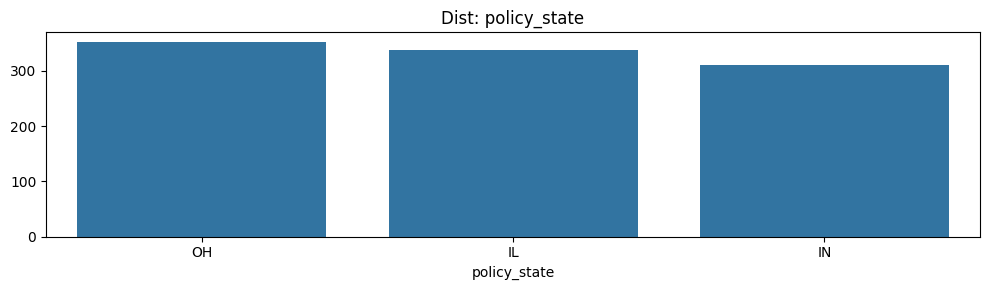

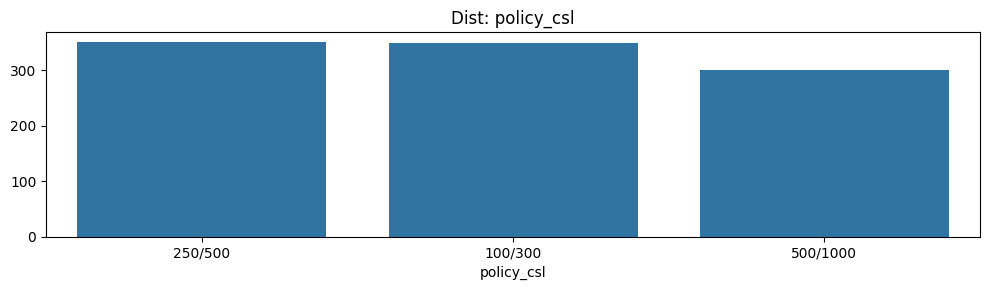

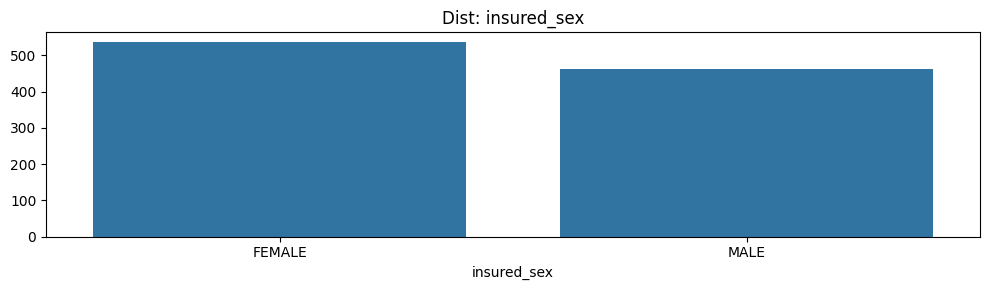

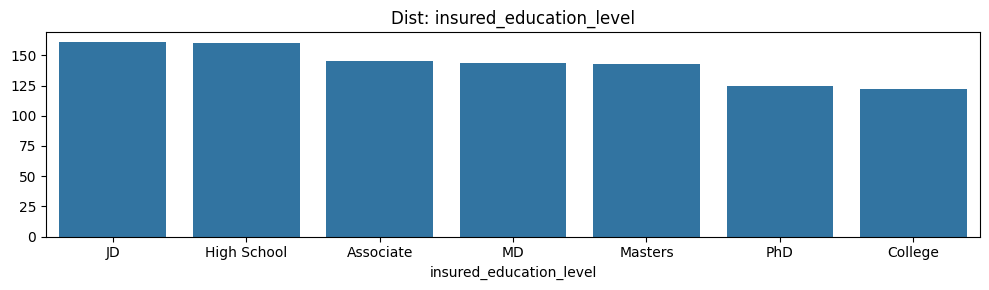

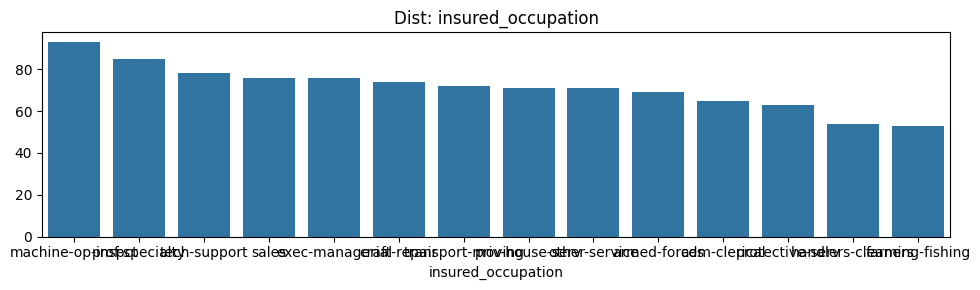

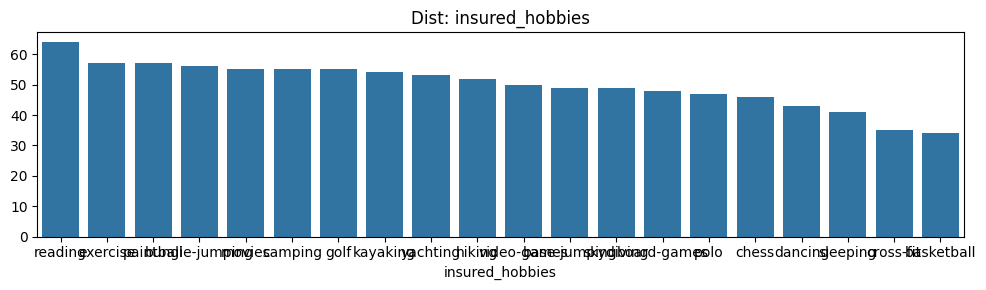

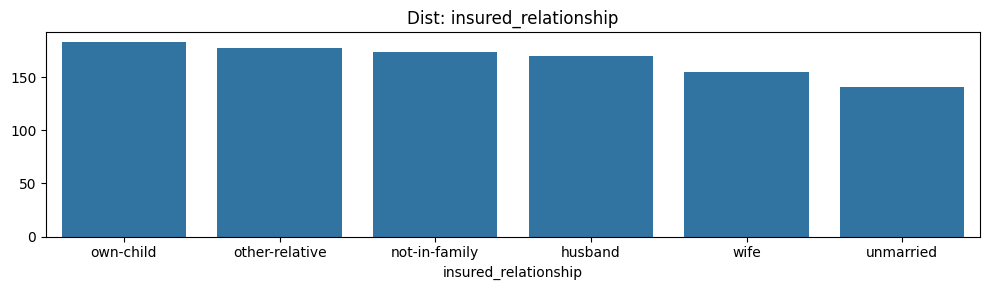

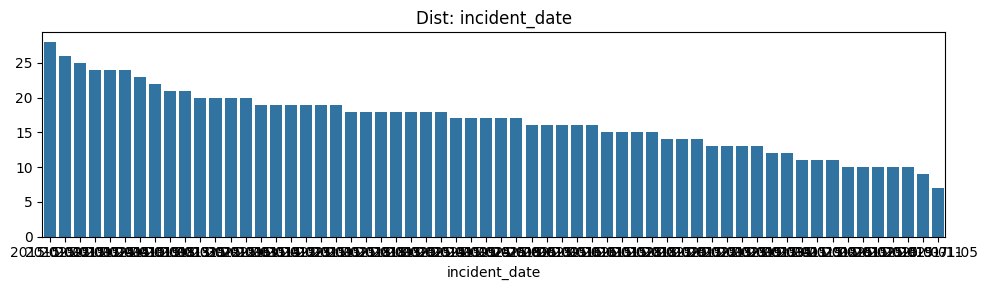

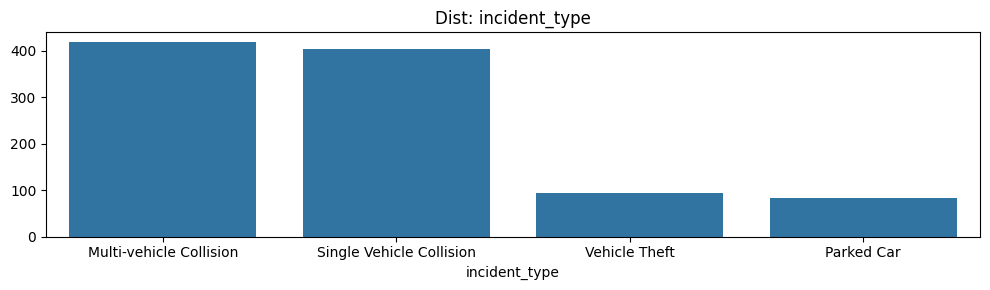

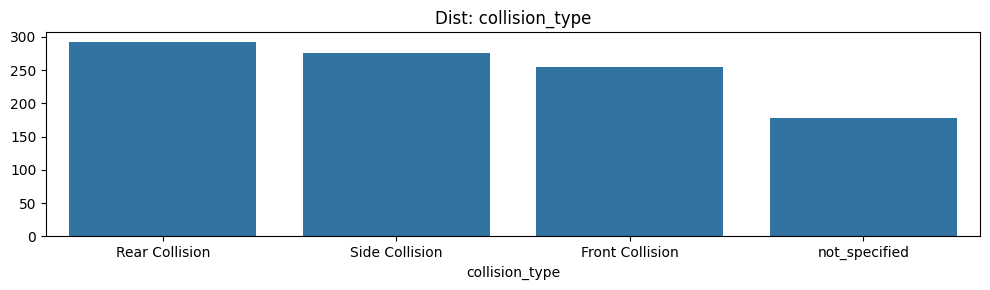

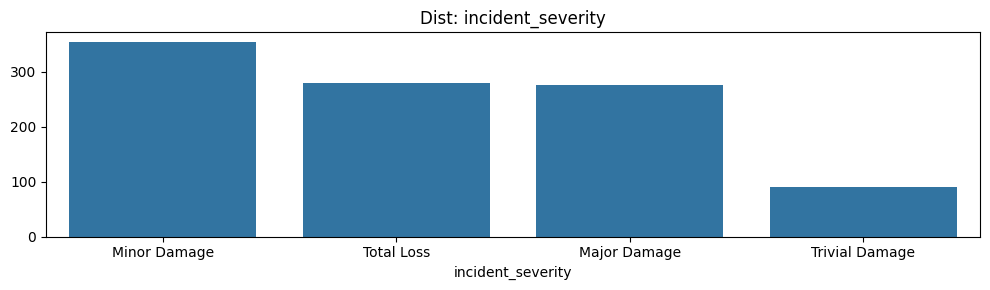

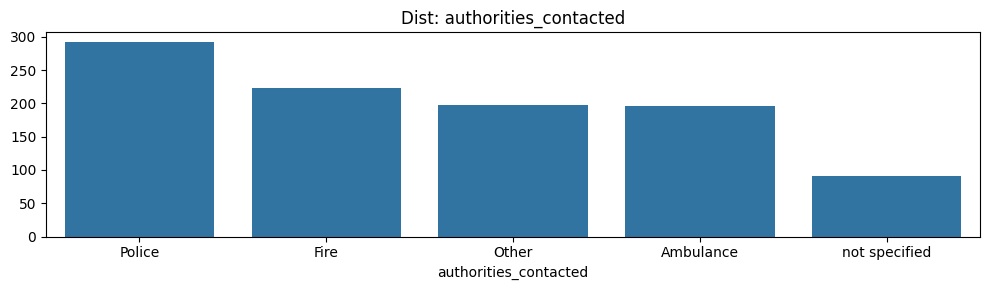

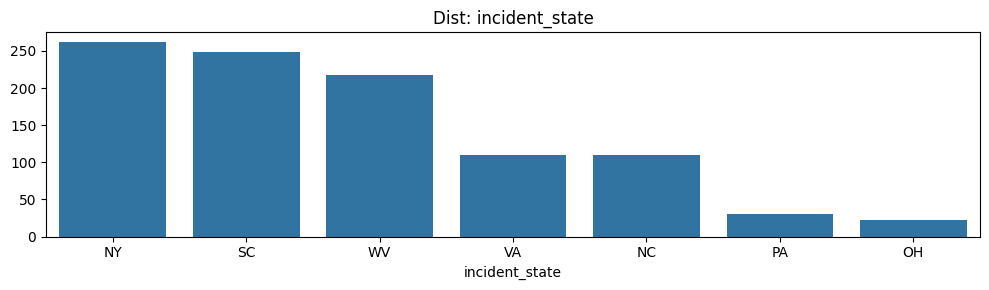

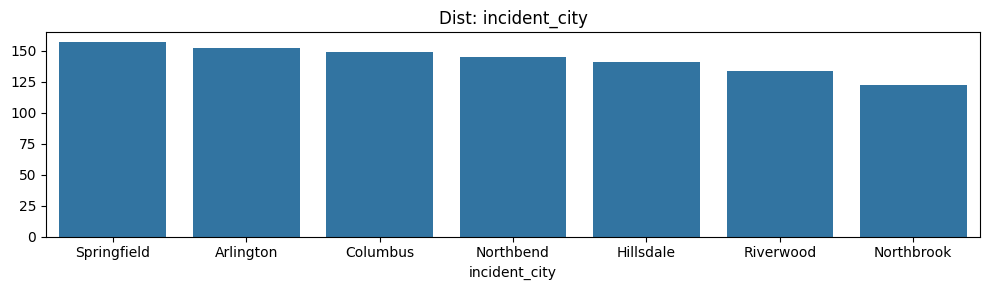

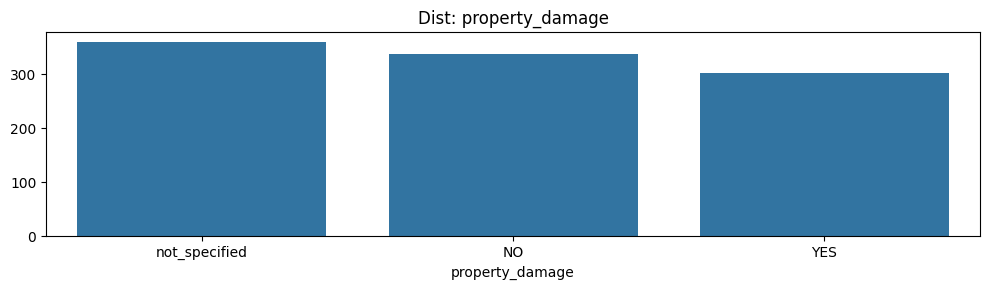

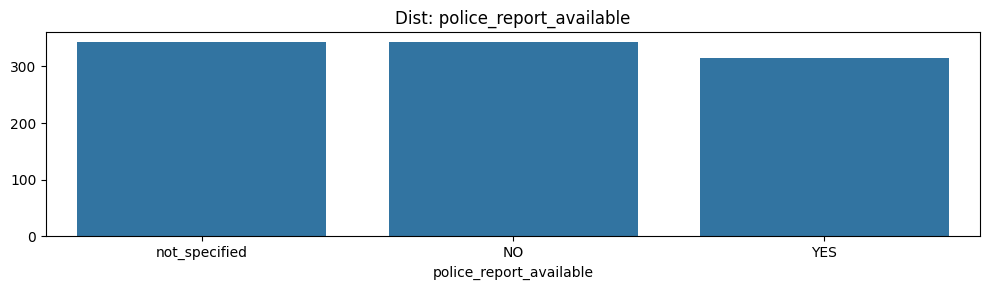

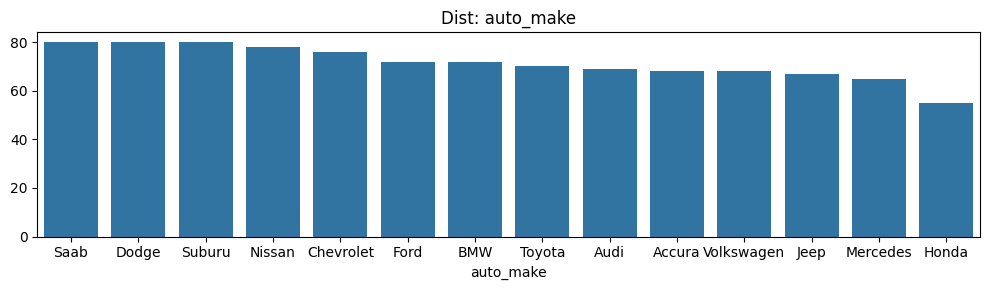

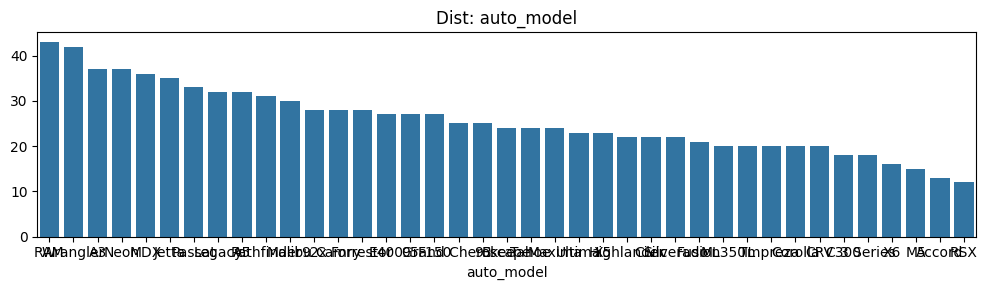

In [7]:
# Distribution of categorical columns
cat_cols = list(df_ins.select_dtypes(include=['object']).columns)

for c in cat_cols:
    x_vals = df_ins[c].value_counts().index
    fig, ax = plt.subplots(1,1, figsize=(10,3))
    sns.barplot(x=x_vals, y=df_ins[c].value_counts().values, ax=ax)
    ax.set_title(f'Dist: {c}')
    plt.tight_layout()

### Feature Engineering

### Dimensionality Reduction

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Select numeric features (exclude target / IDs)
numeric_cols = df_ins.select_dtypes(include=[np.number]).columns.tolist()
target_like = {'fraud_reported'}
numeric_cols = [c for c in numeric_cols if c not in target_like]

X = df_ins[numeric_cols].copy()

# Optional: fill missing numeric with median
X = X.fillna(X.median())

# 2. Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3. Fit PCA (keep enough variance)
pca = PCA(n_components=0.9, random_state=42)  # retain 90% variance
X_pca = pca.fit_transform(X_std)

# 4. Loadings: components_ shape (n_components, n_features)
loadings = pd.DataFrame(pca.components_.T,
                        index=numeric_cols,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# 5. Per-component top features
def top_features_per_pc(load_df, top=5):
    tops = {}
    for pc in load_df.columns:
        tops[pc] = (load_df[pc].abs()
                    .sort_values(ascending=False)
                    .head(top))
    return pd.concat(tops, axis=1)

top_per_pc = top_features_per_pc(loadings, top=5)

# 6. Aggregate overall importance (variance-weighted squared loadings)
var_ratio = pca.explained_variance_ratio_
weighted = (loadings.values**2) * var_ratio  # broadcast
overall_importance = pd.Series(weighted.sum(axis=1),
                               index=loadings.index,
                               name='importance')
overall_importance = (overall_importance / overall_importance.sum()
                     ).sort_values(ascending=False)

# 7. Results
print("Explained variance ratio:", var_ratio.round(3))
print("\nTop features per principal component:")
display(top_per_pc)

print("\nOverall variance-weighted feature importance (top 10):")
display(overall_importance.head(10))

# Optional: loading matrix for first two PCs (biplot-style table)
loadings[['PC1','PC2']].sort_values('PC1', key=lambda s: s.abs(), ascending=False).head(10)

Explained variance ratio: [0.207 0.113 0.07  0.064 0.063 0.062 0.06  0.057 0.056 0.054 0.053 0.05 ]

Top features per principal component:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
total_claim_amount,0.520680,0.068689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_claim,0.499557,0.068041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_claim,0.444903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injury_claim,0.443653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_vehicles_involved,0.198189,NaN,NaN,NaN,NaN,0.314814,0.306655,NaN,NaN,NaN,NaN,NaN
months_as_customer,NaN,0.694752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,0.693846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
witnesses,NaN,0.088533,0.304348,NaN,0.438171,NaN,0.361481,0.526160,NaN,NaN,NaN,0.429568
auto_year,NaN,NaN,0.523406,NaN,NaN,NaN,NaN,NaN,0.534656,0.544749,NaN,NaN
capital-loss,NaN,NaN,0.427363,0.180418,NaN,0.406094,NaN,NaN,NaN,0.612663,NaN,NaN



Overall variance-weighted feature importance (top 10):


bodily_injuries          0.064807
policy_deductable        0.064732
witnesses                0.064516
auto_year                0.064251
umbrella_limit           0.064227
insured_zip              0.063937
total_claim_amount       0.063582
capital-loss             0.063289
policy_annual_premium    0.062869
months_as_customer       0.062267
Name: importance, dtype: float64

,PC1,PC2
total_claim_amount,0.520680,-0.068689
vehicle_claim,0.499557,-0.068041
property_claim,0.444903,-0.061477
injury_claim,0.443653,-0.047499
number_of_vehicles_involved,0.198189,-0.030811
incident_hour_of_the_day,0.163578,0.066391
age,0.086945,0.693846
months_as_customer,0.079739,0.694752
policy_deductable,0.033785,0.043528
bodily_injuries,0.031598,-0.034961


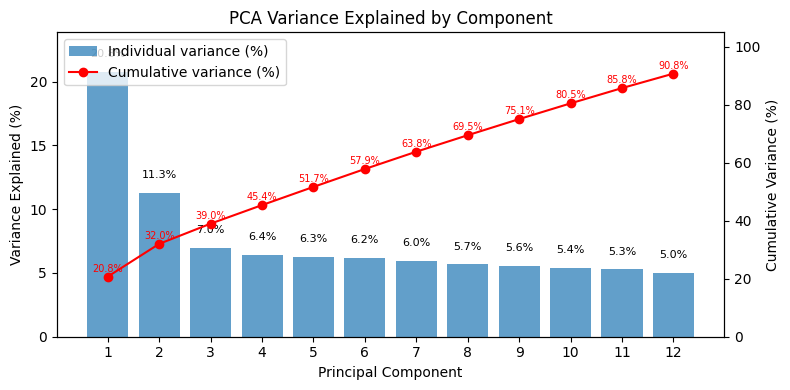

In [9]:
# Visualize variance explained by each principal component
explained_var_pct = (var_ratio * 100).round(2)
cum_var_pct = explained_var_pct.cumsum()

fig, ax1 = plt.subplots(figsize=(8, 4))
components = np.arange(1, len(explained_var_pct) + 1)
bars = ax1.bar(components, explained_var_pct, alpha=0.7, label='Individual variance (%)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('PCA Variance Explained by Component')
ax1.set_xticks(components)
ax1.set_ylim(0, explained_var_pct.max() * 1.15)

ax2 = ax1.twinx()
ax2.plot(components, cum_var_pct, color='red', marker='o', label='Cumulative variance (%)')
ax2.set_ylabel('Cumulative Variance (%)')
ax2.set_ylim(0, 105)

# combine legends
handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)
ax1.legend(handles, labels, loc='upper left')

for rect, pct, cum in zip(bars, explained_var_pct, cum_var_pct):
    ax1.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=8)
    ax2.text(rect.get_x() + rect.get_width() / 2, cum + 1, f"{cum:.1f}%",
             ha='center', va='bottom', fontsize=7, color='red')

plt.tight_layout()
plt.show()

In [10]:
# ==== 1. STRUCTURE & BASIC METADATA ====
print("Shape:", df_ins.shape)
print("\nDtypes:")
print(df_ins.dtypes.value_counts())

# Ensure target numeric
if 'fraud_reported' in df_ins.columns and df_ins['fraud_reported'].dtype == object:
    df_ins['fraud_reported'] = df_ins['fraud_reported'].map({'Y':1,'N':0})

# Basic numeric summary (add skew & kurtosis)
num_cols_all = df_ins.select_dtypes(include=['number']).columns
num_summary = df_ins[num_cols_all].describe().T
num_summary['skew'] = df_ins[num_cols_all].skew()
num_summary['kurtosis'] = df_ins[num_cols_all].kurtosis()
display(num_summary.head(12))

Shape: (1000, 36)

Dtypes:
object     18
int64      17
float64     1
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00,0.362177,-0.485428
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00,0.478988,-0.260255
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00,0.477887,-1.376943
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59,0.004402,0.073889
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00,1.806712,1.792077
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00,0.816554,-1.190711
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00,0.478850,-1.276704
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00,-0.391472,-1.313875
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00,-0.035584,-1.192940
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00,0.502664,-1.500467


In [11]:
# ==== 2. MISSINGNESS PROFILE ====
missing = (df_ins.isna().sum().sort_values(ascending=False)).to_frame('missing')
missing['pct'] = (missing['missing']/len(df_ins)*100).round(2)
display(missing.head(20))

# Bar of top missing
import matplotlib.pyplot as plt
top_miss = missing[missing['missing']>0].head(15)
if not top_miss.empty:
    top_miss['pct'].plot(kind='barh', figsize=(6,4), title='Top Missing (%)')
    plt.gca().invert_yaxis()
    plt.xlabel('%')
    plt.tight_layout()

,missing,pct
months_as_customer,0,0.0
age,0,0.0
policy_state,0,0.0
policy_csl,0,0.0
policy_deductable,0,0.0
policy_annual_premium,0,0.0
umbrella_limit,0,0.0
insured_zip,0,0.0
insured_sex,0,0.0
insured_education_level,0,0.0


fraud_reported
0    753
1    247
Name: count, dtype: int64

Fraud rate: 24.7 %


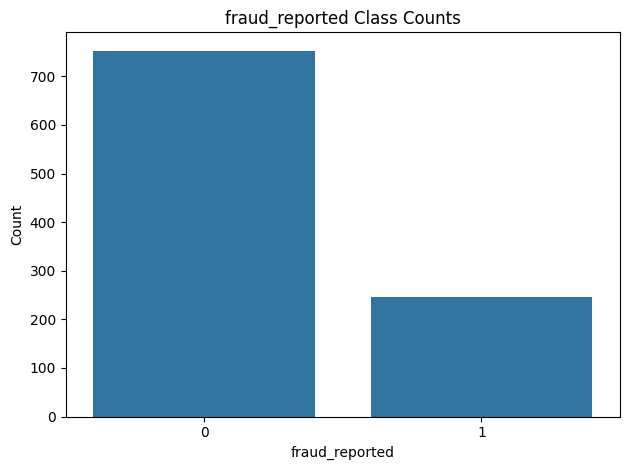

In [12]:
# ==== 3. TARGET DISTRIBUTION & CLASS IMBALANCE ====
if 'fraud_reported' in df_ins.columns:
    tgt_counts = df_ins['fraud_reported'].value_counts()
    print(tgt_counts)
    print("\nFraud rate:", (tgt_counts.get(1,0)/tgt_counts.sum()*100).round(2), "%")
    sns.barplot(x=tgt_counts.index.astype(str), y=tgt_counts.values)
    plt.title('fraud_reported Class Counts')
    plt.ylabel('Count'); plt.xlabel('fraud_reported')
    plt.tight_layout()

Stored frequency tables for: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available']


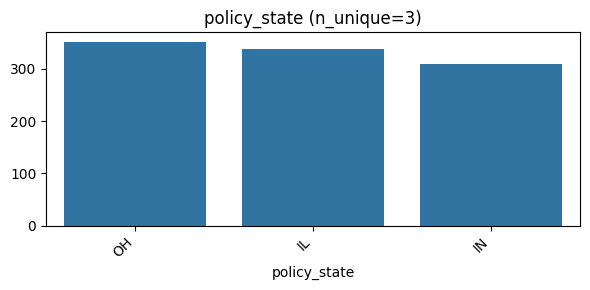

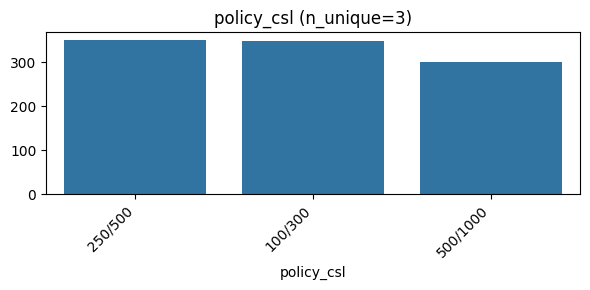

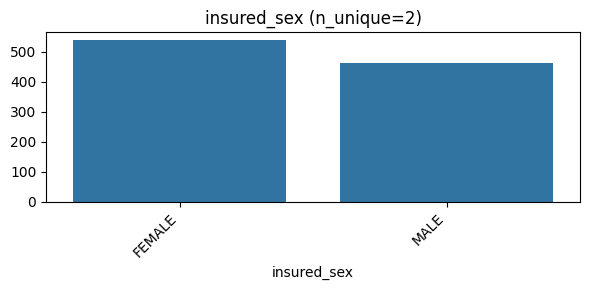

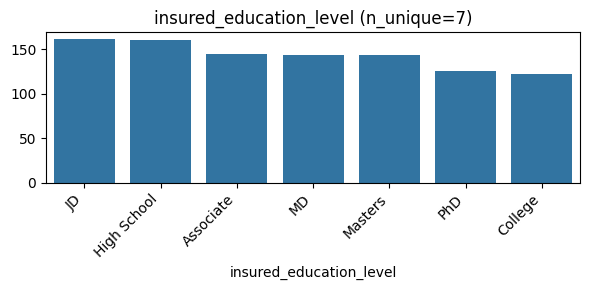

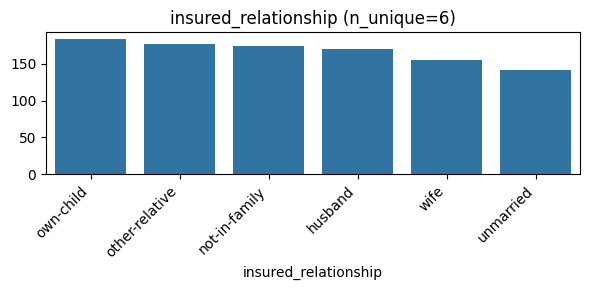

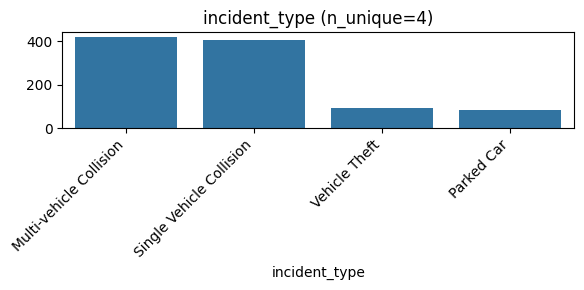

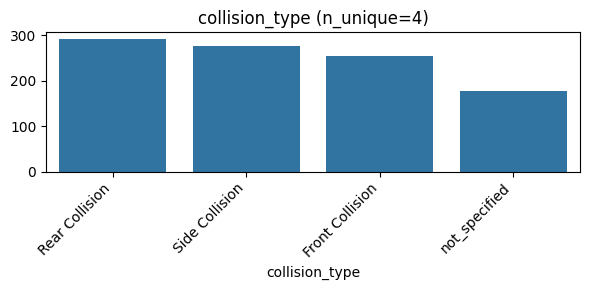

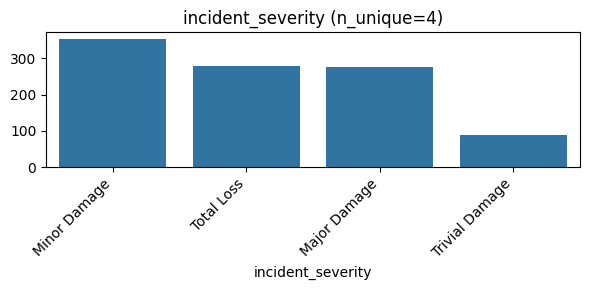

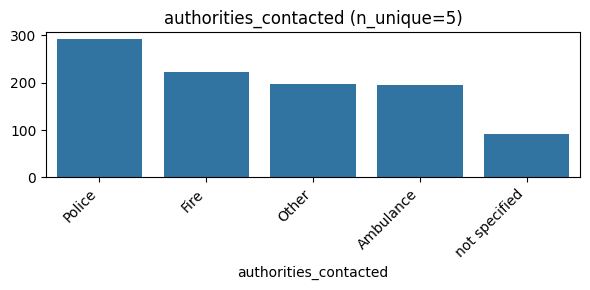

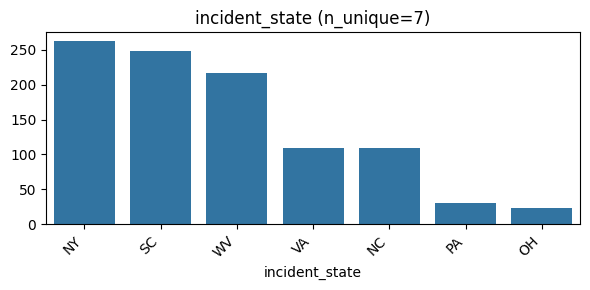

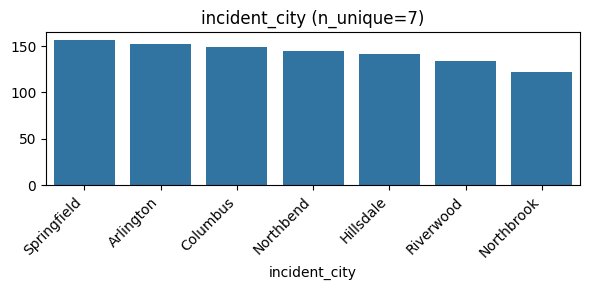

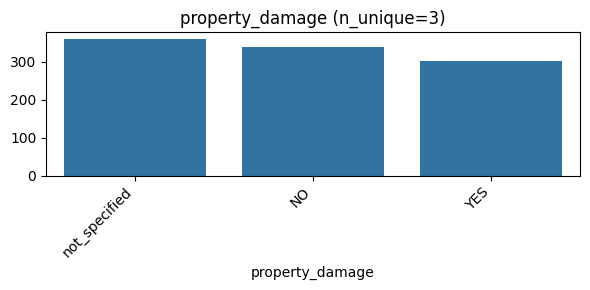

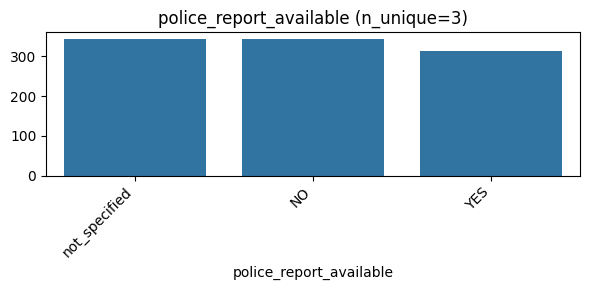

In [13]:
# ==== 4. CATEGORICAL FREQUENCIES (LOW / MID CARDINALITY) ====
cat_cols = df_ins.select_dtypes(include=['object']).columns.tolist()
freq_tables = {}
for c in cat_cols:
    n_unique = df_ins[c].nunique(dropna=True)
    if n_unique <= 12:   # plot only small-cardinality
        freq = df_ins[c].value_counts(dropna=False)
        freq_tables[c] = freq
        plt.figure(figsize=(6,3))
        sns.barplot(x=freq.index.astype(str), y=freq.values)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{c} (n_unique={n_unique})')
        plt.tight_layout()
print("Stored frequency tables for:", list(freq_tables.keys()))

Residual abs summary (total - sum(parts)):
count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64
Rows with |residual| > 1: 0


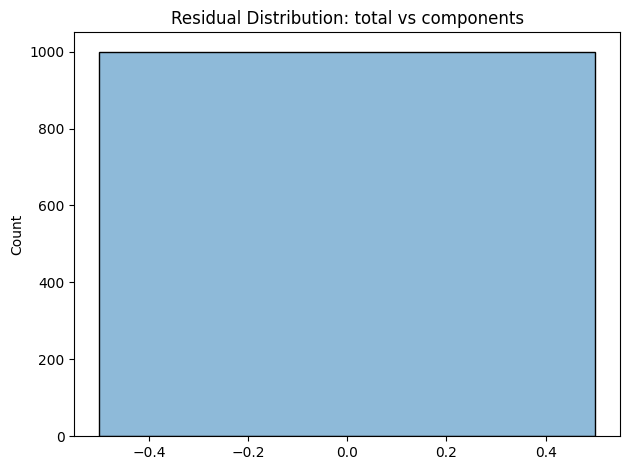

In [14]:
# ==== 5. CLAIM COMPONENT CONSISTENCY ====
if set(['total_claim_amount','injury_claim','property_claim','vehicle_claim']).issubset(df_ins.columns):
    resid = df_ins['total_claim_amount'] - (
        df_ins['injury_claim'] + df_ins['property_claim'] + df_ins['vehicle_claim']
    )
    resid_abs = resid.abs()
    print("Residual abs summary (total - sum(parts)):")
    print(resid_abs.describe())
    inconsistent_rows = resid_abs[resid_abs > 1].shape[0]
    print("Rows with |residual| > 1:", inconsistent_rows)
    sns.histplot(resid, kde=True)
    plt.title('Residual Distribution: total vs components')
    plt.tight_layout()

Top correlations w/ fraud_reported:
 fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
Name: fraud_reported, dtype: float64


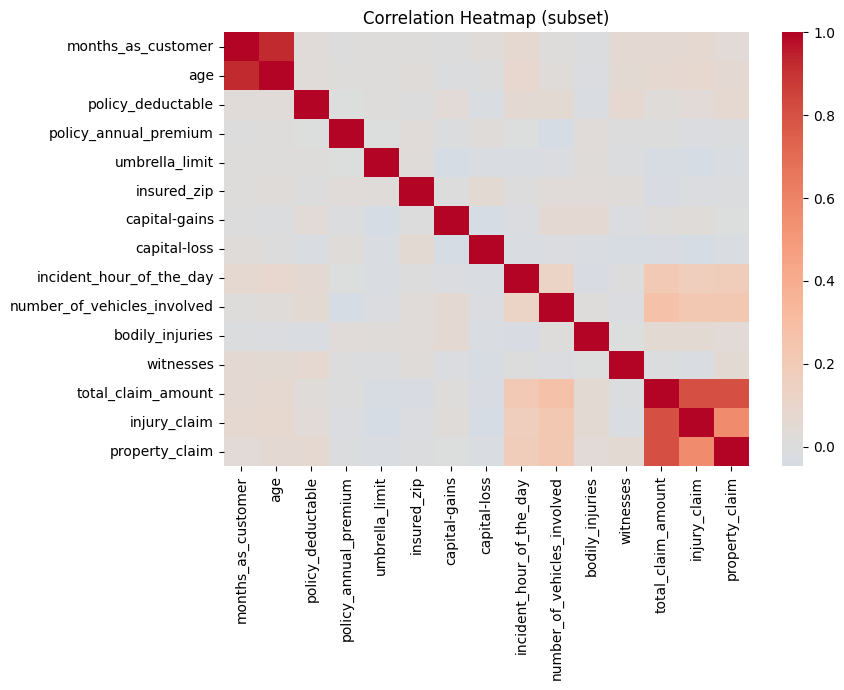

In [15]:
# ==== 6. CORRELATION (NUMERIC) & TOP PAIRS ====
corr = df_ins[num_cols_all].corr()
# Pick top absolute correlations with target if present
if 'fraud_reported' in corr.columns:
    target_corr = corr['fraud_reported'].abs().sort_values(ascending=False).head(10)
    print("Top correlations w/ fraud_reported:\n", target_corr)
# Heatmap (cap to first 15 for readability)
subset_cols = corr.columns[:15]
plt.figure(figsize=(9,7))
sns.heatmap(corr.loc[subset_cols, subset_cols], cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap (subset)')
plt.tight_layout()

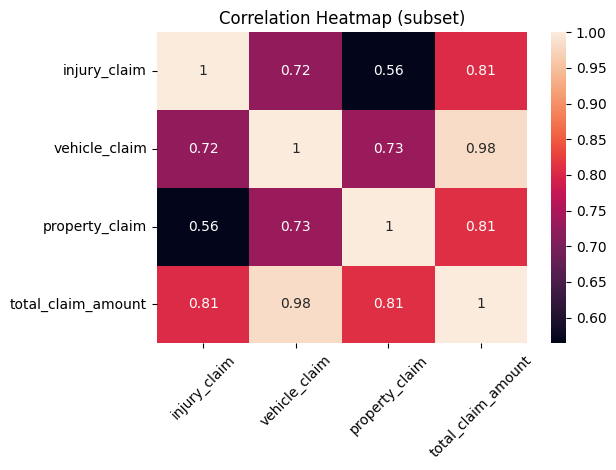

In [34]:
# Highly correlated columns
high_corr_cols = ['injury_claim', 'vehicle_claim', 'property_claim', 'total_claim_amount']
sns.heatmap(df_ins[high_corr_cols].corr(), annot=True)
plt.title('Correlation Heatmap (subset)')
plt.xticks(rotation=45)
plt.tight_layout()


In [16]:
# ==== 7. OUTLIER FLAGGING (IQR) FOR KEY NUMERIC FIELDS ====
key_num = [c for c in ['policy_annual_premium','total_claim_amount',
                       'injury_claim','property_claim','vehicle_claim','age']
           if c in df_ins.columns]

outlier_summary = []
outlier_flags = pd.DataFrame(index=df_ins.index)

for c in key_num:
    q1, q3 = df_ins[c].quantile([0.25,0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (df_ins[c] < lo) | (df_ins[c] > hi)
    outlier_flags[f'{c}_outlier'] = mask
    outlier_summary.append({
        'feature': c,
        'lower_bound': lo,
        'upper_bound': hi,
        'count': int(mask.sum()),
        'pct': round(100*mask.mean(),2)
    })

outlier_summary_df = pd.DataFrame(outlier_summary)
display(outlier_summary_df)

outlier_flags['any_outlier'] = outlier_flags.any(axis=1)
print("Rows flagged by >=1 key feature:", outlier_flags['any_outlier'].sum())

,feature,lower_bound,upper_bound,count,pct
0,policy_annual_premium,600.47625,1904.82625,9,0.9
1,total_claim_amount,-1357.50000,113762.50000,1,0.1
2,injury_claim,-6220.00000,21820.00000,0,0.0
3,property_claim,-5215.00000,20545.00000,6,0.6
4,vehicle_claim,-502.50000,81617.50000,0,0.0
5,age,14.00000,62.00000,4,0.4


Rows flagged by >=1 key feature: 20


,mean,count
incident_type,,
Multi-vehicle Collision,0.272076,419
Single Vehicle Collision,0.290323,403
Vehicle Theft,0.085106,94
Parked Car,0.095238,84


,mean,count
incident_severity,,
Minor Damage,0.107345,354
Total Loss,0.128571,280
Major Damage,0.605072,276
Trivial Damage,0.066667,90


,mean,count
authorities_contacted,,
Police,0.208904,292
Fire,0.269058,223
Other,0.318182,198
Ambulance,0.290816,196
not specified,0.065934,91


,mean,count
insured_occupation,,
machine-op-inspct,0.236559,93
prof-specialty,0.211765,85
tech-support,0.282051,78
sales,0.276316,76
exec-managerial,0.368421,76
craft-repair,0.297297,74
transport-moving,0.291667,72
other-service,0.169014,71


,mean,count
incident_state,,
NY,0.221374,262
SC,0.294355,248
WV,0.179724,217
VA,0.227273,110
NC,0.309091,110
PA,0.266667,30
OH,0.434783,23


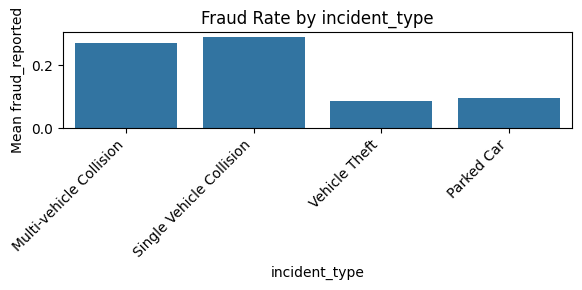

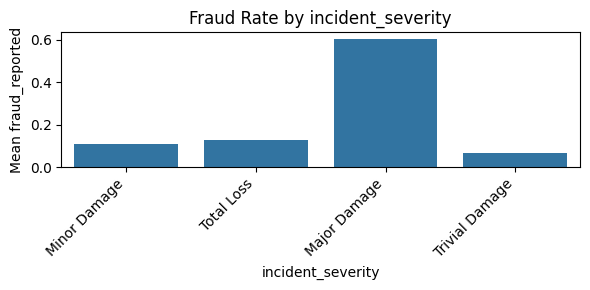

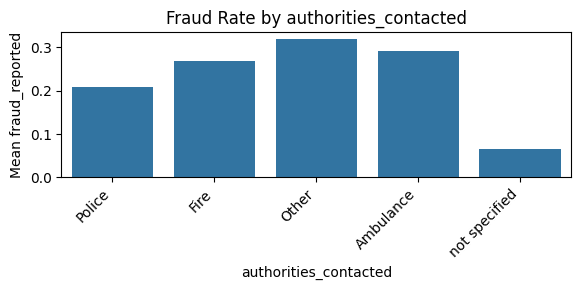

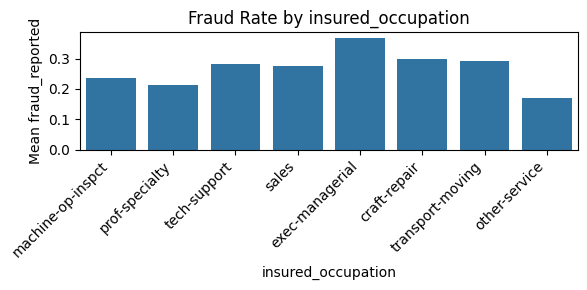

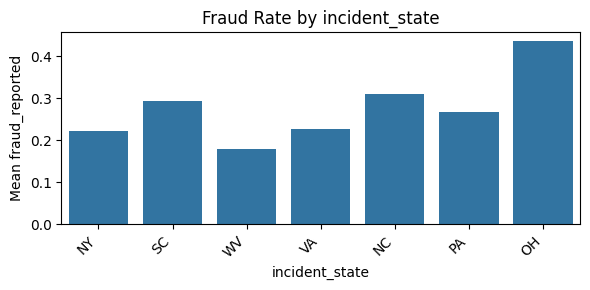

In [17]:
# ==== 8. FRAUD RATE BY SELECT CATEGORIES ====
def fraud_rate_by(col, top=8):
    if col not in df_ins.columns or 'fraud_reported' not in df_ins.columns:
        return
    freq = (df_ins.groupby(col)['fraud_reported']
               .agg(['mean','count'])
               .sort_values('count', ascending=False)
               .head(top))
    display(freq)
    plt.figure(figsize=(6,3))
    sns.barplot(x=freq.index.astype(str), y=freq['mean'])
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Mean fraud_reported')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

for cat in ['incident_type','incident_severity','authorities_contacted','insured_occupation','incident_state']:
    if cat in df_ins.columns: fraud_rate_by(cat)

In [18]:
# ==== 9. OPTIONAL: VARIANCE FILTER & TOP NUMERIC FEATURE SPREAD ====
variances = df_ins[num_cols_all].var().sort_values(ascending=False)
print("Top variance numeric features:")
print(variances.head(10))

Top variance numeric features:
umbrella_limit           5.278077e+12
insured_zip              5.141121e+09
capital-loss             7.898403e+08
capital-gains            7.768588e+08
total_claim_amount       6.970410e+08
vehicle_claim            3.566905e+08
injury_claim             2.382369e+07
property_claim           2.327798e+07
policy_deductable        3.743784e+05
policy_annual_premium    5.961772e+04
dtype: float64
